In [1]:
# Automatic reload of the modules when their source code changes 
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import qutip as qt 
import matplotlib.pyplot as plt
import sys
import os 

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from ECD_control.gate_definitions_qutip import *

# ECD circuit examples
For each example, we load in ECD parameters from a npz file. We then simulate the circuit applied to vacuum, and plot its Wigner function.

Note that the circuit depth $N$ is $N_{ECD} - 1$ for state prep, as the final ECD gate can be performed as an unconditional displacement, and we don't count this final ECD gate in the depth. 

In [14]:
def circuit_sim(filename, N=150):
    #Load the ECD parameters file
    betas = np.load(filename)['betas']
    phis = np.load(filename)['phis']
    thetas = np.load(filename)['thetas']
    #Can print the parameters:
    print('ECD parameters:')
    print('Circuit depth: N = %d' % (len(betas)-1))
    print('betas: ' + str(betas))
    print('phis: ' + str(phis))
    print('thetas:' + str(thetas))

    #qutip circuit simulation
    N = 150
    psi0 = qt.tensor(qt.basis(2,0), qt.basis(N,0)) #ground state initial

    #get the unitary
    U = U_circuit_ECD(betas, phis, thetas, N)

    #apply the unitary
    psif = U*psi0

    #plot the cavity Wigner function
    xvec = np.linspace(-5,5,401)
    plot_wigner(psif.ptrace(1), xvec=xvec)

### GKP +Z State
$\Delta = 0.306$, optimized to $F = 99\%$

ECD parameters:
Circuit depth: N = 9
betas: [-2.6382792e-01+1.8443625e+00j -5.0609738e-01+8.6941522e-01j
 -1.3805865e+00-3.7645575e-01j  2.5752213e+00+9.4614542e-01j
 -1.5947972e-01-3.2464623e-01j -5.8037400e-02+1.9739866e+00j
  2.7303159e-01-1.1620376e+00j -6.0785359e-01+2.3638756e+00j
 -1.9131708e-01-5.5688761e-02j -7.3992478e-06+4.9504994e-05j]
phis: [ 0.0000000e+00  1.5708030e+00 -1.5708077e+00 -1.5708636e+00
 -1.5708264e+00  1.5707130e+00 -1.5707968e+00  1.5707079e+00
 -1.5707320e+00 -4.6289497e-05]
thetas:[ 1.5707824  -0.94528544  2.242129   -1.8487303   2.3272734  -1.1924248
  2.0623205   2.4493968   1.6041665   4.7123394 ]


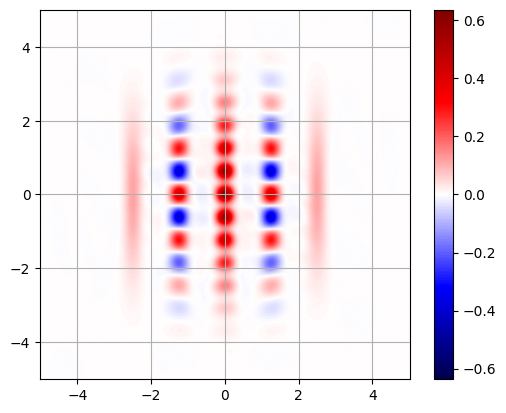

In [6]:
filename = '../ECD_control/ECD_circuits/state_prep/GKP_states/GKP_plus_Z_delta_0.306_F_99.npz'
circuit_sim(filename, N=150)

### GKP +Y State
$\Delta = 0.306$, optimized to $F = 99\%$

ECD parameters:
Circuit depth: N = 10
betas: [-2.2823486e+00-2.3403134e+00j  2.3601592e+00+5.1252257e-02j
 -5.2362436e-01-1.8639278e+00j -2.2552267e-01+1.0961747e+00j
  1.1857696e+00+6.7941105e-01j  1.3579334e+00+4.9684316e-01j
  1.2302717e+00-9.0543497e-01j -8.0640101e-01+7.0412293e-02j
  7.0015526e-01-8.7560451e-01j -1.7343359e-01-1.9403589e-01j
  1.9300250e-04+8.3829553e-05j]
phis: [ 0.         1.5705625 -1.570936  -1.5707308  1.5709955  1.5708607
  1.5708761 -1.5707929 -1.5709194 -4.7126827  3.1417985]
thetas:[ 1.5705938  2.666242  -1.0990742  2.2488391 -1.8401893  1.6815717
 -1.8506246  1.6384616 -0.3027082 -1.7854878  4.7124333]


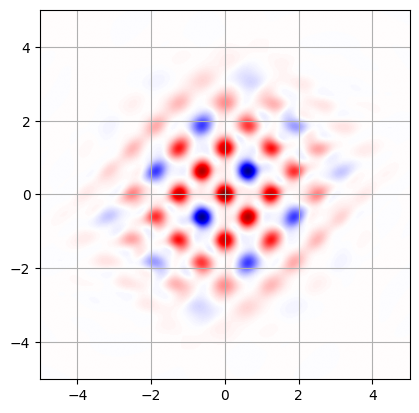

In [13]:
filename = '../ECD_control/ECD_circuits/state_prep/GKP_states/GKP_plus_Y_delta_0.306_F_99.npz'
circuit_sim(filename, N=150)

### Fock 5 state
optimized fo $F = 99\%$

ECD parameters:
Circuit depth: N = 8
betas: [-2.1849225e+00-3.6020952e-01j -1.7626581e-01-1.3803736e+00j
 -1.9729354e+00+9.7003108e-01j  3.6277714e-01-9.1108978e-01j
  1.5998919e-01+2.0672994e+00j -1.3422889e+00-3.1998071e-01j
  1.1030314e+00+8.8895723e-02j -6.1697608e-01-1.9967125e-01j
 -2.8079171e-06-2.9411551e-06j]
phis: [ 0.        -1.5707881 -1.5708104 -1.5707625  1.5707455 -4.712323
  1.5707451 -4.7123623  6.283152 ]
thetas:[ 1.5707964  1.6247356 -1.1682785  2.6107469 -2.112066   1.7648262
  2.9815953 -0.5707648  1.5707903]


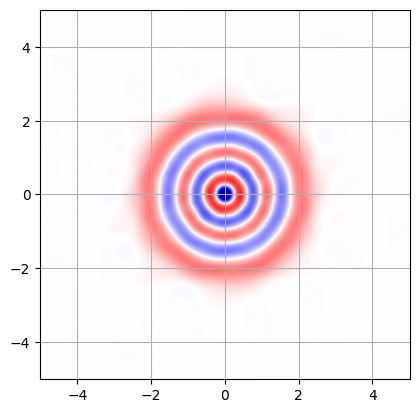

In [14]:
filename = '../ECD_control/ECD_circuits/state_prep/fock_states/fock_5_F_99.npz'
circuit_sim(filename, N=80)

### Kitten-code +Y state
optimized fo $F = 99%$

ECD parameters:
Circuit depth: N = 5
betas: [-1.6791348 -0.45738742j  1.442646  -1.5703454j  -0.42270523+0.8626163j
  0.24717523-1.3528787j  -0.40499672-0.02108315j -0.04202466-0.05907362j]
phis: [ 0.        -1.4795454 -1.8798764 -1.1668798  1.0934193 -2.6821597]
thetas:[-1.5768628 -1.6636173  2.5807245  2.1501944 -1.7170584  1.5558712]


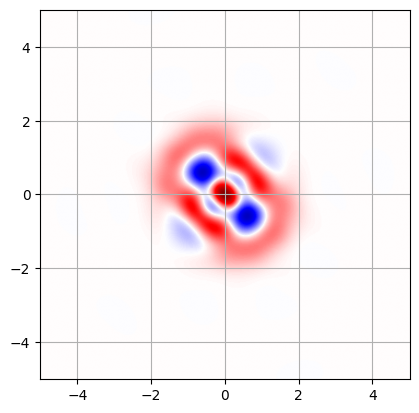

In [15]:
filename = '../ECD_control/ECD_circuits/state_prep/kitten_code_states/state_+Y_F_99.npz'
circuit_sim(filename, N=80)

### Hexagonal GKP +X state

ECD parameters:
Circuit depth: N = 10
betas: [-2.37582   -0.24121812j  1.1862485 +0.48638633j -1.2951845 -0.8212967j
 -0.76333606-0.04612793j -0.75610274+2.613403j   -0.47687602-2.3067474j
  0.87205696-0.04785889j -1.7740954 +0.96134067j -2.550345  +0.9144941j
 -0.0948885 -0.2204862j   0.0514197 -0.02038321j]
phis: [ 0.         -1.4840312  -1.6885097   1.1773231   2.63614     0.5814538
 -0.43398595  0.3949492  -0.455153    0.39383316 -1.978132  ]
thetas:[ 1.5917709  -2.0959153   2.0651581   2.8632185   0.84349465  1.7637589
  1.7740505   2.5094945   0.16880059  1.4497192   1.5778754 ]


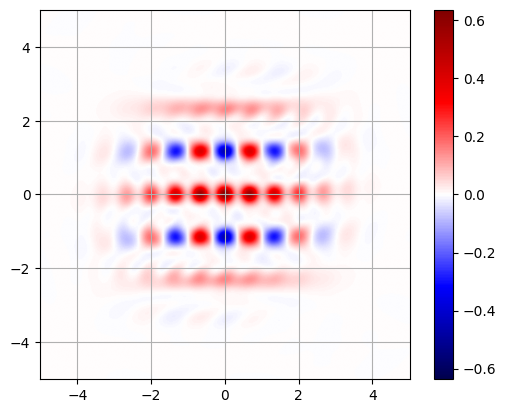

In [8]:
filename = '../ECD_control/ECD_circuits/state_prep/GKP_states/GKP_hex_+X_Delta_0.306_F_98.npz'
circuit_sim(filename, N=150)

### Fock 3 (test)

ECD parameters:
Circuit depth: N = 6
betas: [ 1.7213486e+00+7.3711145e-01j  2.5224486e-02-1.6181049e+00j
  3.3726805e-01-1.0890026e+00j -1.6884073e+00+1.3465215e+00j
  1.7314637e-01+5.1089859e-01j  3.0625358e-01+1.1181692e-01j
  1.5837992e-05+3.2449176e-04j]
phis: [ 2.4567668 -0.9216497  0.9516804  2.3063986 -2.4546044 -0.6102104
  2.1636279]
thetas:[-1.5722258 -1.1603059  0.9203694 -2.7346857  2.3112547 -1.7992163
 -1.6153878]


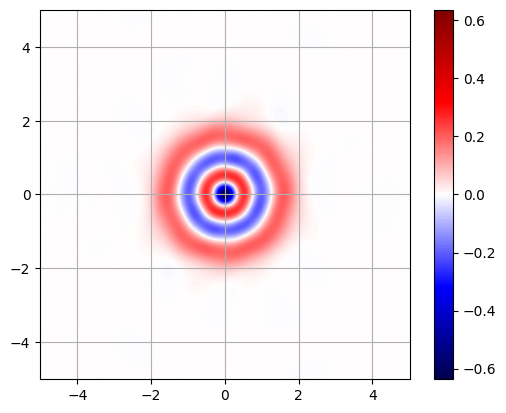

In [17]:
filename = '../ECD_control/ECD_circuits/state_prep/fock_states/fock_3_F_99.00_test.npz'
# data = np.load(filename)
# print(data.files)
circuit_sim(filename, N=150)